In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

fft_points = 4096
fs = 15360.0
delta_ts = 1 / fs
average = 5
overlap = 2.0/3.0

N = fft_points + int(( average -1 ) * fft_points * ( 1.0 - overlap ))
t = np.arange(0, N*delta_ts, delta_ts)
t1 = np.arange(0, fft_points*delta_ts, delta_ts)
k = np.arange(fft_points)
x = np.zeros_like(t)
y = np.zeros_like(fft_points)
x_part = np.zeros_like(t1)
y_average = np.zeros_like(fft_points)
flat_window = np.ones_like(t1)

In [2]:
print(x_part.size)

4096


In [23]:
print(k)

[   0    1    2 ... 4093 4094 4095]


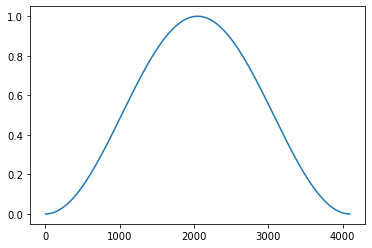

In [18]:
hanning_window = 0.5 * ( 1.0 + np.cos( 2.0 * math.pi * k / float(fft_points-1) - math.pi) )
plt.plot(k,hanning_window)
plt.show()

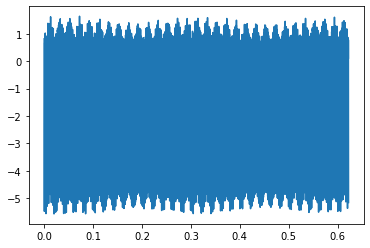

In [4]:
for i in range(0, N):
    x[i] = 0.5680 / 2.0 * np.sin( 2.0 * math.pi * float(i) * delta_ts * 49.94 + 4.0 )
    x[i] += 0.2850 / 2.0 * np.sin( 2.0 * math.pi * float(i) * delta_ts * 355.11 + 3.8 )
    x[i] += 0.3143 / 2.0 * np.sin( 2.0 * math.pi * float(i) * delta_ts * 358.85 + 2.6 )
    x[i] += 6.1974 / 2.0 * np.sin( 2.0 * math.pi * float(i) * delta_ts * 913.47 + 2.4 )
    x[i] += 0.7003 / 2.0 * np.sin( 2.0 * math.pi * float(i) * delta_ts * 1826.94 + 1.2 )
    x[i] += 0.9333 / 2.0 * np.sin( 2.0 * math.pi * float(i) * delta_ts * 2740.40 + 0.8 )
    x[i] += 0.9028 / 2.0 * np.sin( 2.0 * math.pi * float(i) * delta_ts * 3653.84 + 0.6 )
    x[i] += 0.2851 / 2.0 * np.sin( 2.0 * math.pi * float(i) * delta_ts * 4567.40 + 0.2 )
    x[i] += -2.0

average = 5
x.size = 9557


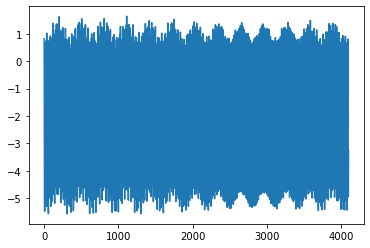

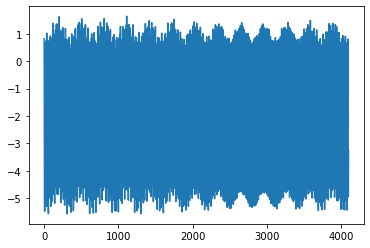

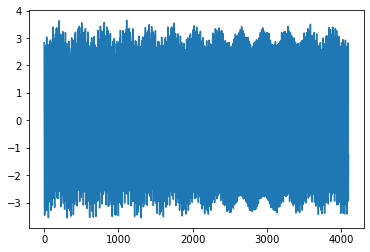

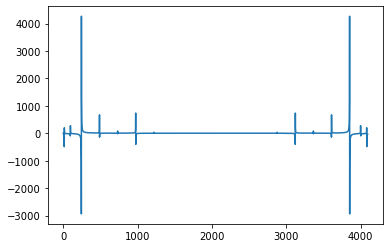

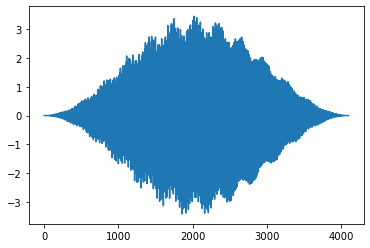

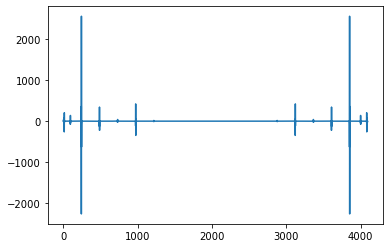

In [22]:
print('average =', average)
print('x.size =', x.size)

plt.plot(k,x[0:4096])
plt.show()

np.multiply(x[0:4096], flat_window, x_part)

plt.plot(k,x_part)
plt.show()

dc_current=x_part.mean()
x_part=x_part-dc_current

plt.plot(k,x_part)
plt.show()

y = np.fft.fft(x_part)
plt.plot(k,y)
plt.show()

np.multiply( x_part, hanning_window, x_part)

plt.plot(k,x_part)
plt.show()

y = np.fft.fft(x_part)
plt.plot(k,y)
plt.show()

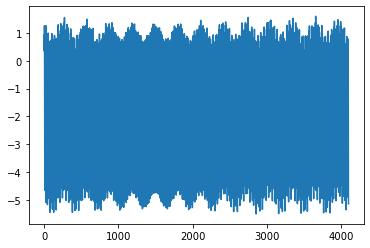

In [12]:
for i in range(0, average):
    a_start = int( i * fft_points * (1.0-overlap))
    a_end = a_start + fft_points
    np.multiply( x[a_start:a_end], flat_window, x_part)
plt.plot(k,x_part)
plt.show()

In [24]:
hanning_input = np.loadtxt('hanning_result.txt', delimiter='\r\n')
plt.plot(k[0:hanning_input.size],hanning_input)
plt.show()